<center><img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F640%2F0*_6WEDnZubsQfTMlY.png&f=1&nofb=1'><center>

### Performing Data Pre-Processing


In [17]:
# Importing libraries

import pandas as pd
from collections import Counter
import itertools

# Reading the dataset

DataFrame = pd.read_csv('./Dataset/creditcard.csv')

In [18]:
DataFrame.shape

(284807, 31)

#### There are a total of 284,807 transactions with only 492 of them being fraud. Let’s import the necessary modules, load our dataset, and perform EDA on our dataset. Here is a peek at our dataset:

In [19]:
DataFrame.head().transpose() # I've transpose the dataset do no need to scroll horizontally for checking columns

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


#### Now, check for null values in the credit card dataset. Luckily, there aren’t any null or NaN values in our dataset.

In [20]:
DataFrame.isnull().values.any()

False

#### The feature we are most interested in is the “Amount”. Here is the summary of the feature.

In [21]:
DataFrame['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

#### Now, let’s check the number of occurrences of each class label and plot the information using matplotlib.

In [22]:
non_fraud = DataFrame[DataFrame['Class']==0].shape[0]

In [23]:
fraud = DataFrame[DataFrame['Class']==1].shape[0]

In [24]:
fraud_percent = (fraud/(non_fraud + fraud))*100

In [25]:
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


#### Let’s plot the above information using matplotlib.

In [26]:
import matplotlib.pyplot as plt

In [27]:
labels = ['Genuine','Fraud']

In [28]:
title = "Class Imbalance"

In [29]:
count_classes = DataFrame['Class'].value_counts()

In [30]:
count_classes.index = ['Genuine','Fraud']

<AxesSubplot:title={'center':'Class Imbalance'}, xlabel='Class', ylabel='Count'>

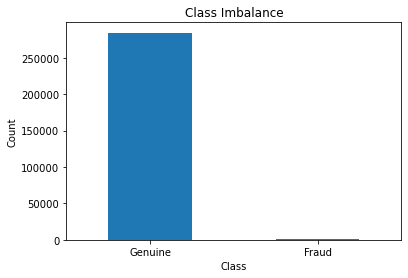

In [31]:
count_classes.plot(kind = 'bar',rot = 0,title = title, ylabel = "Count",xlabel = "Class")

#### We can observe that the genuine transactions are over 99%! This is not good.

### Performing Feature Engineering

#### Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

In [32]:
import numpy as np

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
DataFrame['NormalizedAmount'] = scaler.fit_transform(DataFrame["Amount"].values.reshape(-1, 1))

In [38]:
DataFrame.drop(["Amount", "Time"], inplace= True, axis= 1)

In [39]:
DataFrame.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'NormalizedAmount'],
      dtype='object')

In [40]:
Y = DataFrame['Class']
X = DataFrame.drop(['Class'],axis = 1)

In [41]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [43]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'NormalizedAmount'],
      dtype='object')

#### Now, it’s time to split credit card data with a split of 70-30 using train_test_split().